# A Gentle Introduction to Probability and Statistical Thinking

In this notebook, we review some basic concepts of probability and statistics, supported by simple Python code examples.

For more detailed explanations and the bigger picture, you can read my Medium post Two Ways of Thinking About Uncertainty, where these ideas are discussed more thoroughly.

Two Ways of Thinking About Uncertainty — <https://medium.com/@bskky001/two-ways-of-thinking-about-uncertainty-28cf1e38d2a7>



## 1️⃣ Probability: The Language of Uncertainty

🎲 **Random Experiment:** a process where the outcome is uncertain, even though the experiment itself is well-defined.

🌍 **Sample Space (Ω):** the set of all possible outcomes of a random experiment.

🎯 **Event:** any subset of the sample space (E ⊂ Ω).

📏 **Probability:** assigning a number between 0 and 1 to an event.
* 0 → impossible event
* 1 → certain event

  Everything in between represents different levels of uncertainty.


### 🪙 **A Simple Random Experiment (Coin Toss)**

* The sample space is

  Ω = {Heads, Tails}
* Each toss has an uncertain outcome

* The experiment itself is clearly defined

* Re-running the code produces different results

Now, we can focus on a specific event, such as getting heads.

Let

X = “Getting Heads”

For a fair coin, the probability of this event is:

P(X) = 0.5

In the notebook, we’ll estimate this probability using Python by repeating the experiment many times and observing how often the event occurs.

In [ ]:
import random

def toss_coin():
    return random.choice(["Heads", "Tails"])

# Run the random experiment multiple times
trials = 10
results = [toss_coin() for _ in range(trials)]

print(results)

['Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails']


### **🪙Estimating the Probability by Repeating the Experiment**

Now let’s repeat the coin toss many times, count the outcomes, and estimate the probability of getting heads.

We repeat the coin toss 10,000 times and record the results.
Then we count how many times we get Heads.

Finally, we estimate the probability of getting heads as:

$$
P(Heads) ≈ Number of Heads / Total Tosses
$$

In [ ]:
import random
from collections import Counter

def toss_coin():
    return random.choice(["Heads", "Tails"])

# Number of trials
trials = 10000

# Run the random experiment
results = [toss_coin() for _ in range(trials)]

# Count outcomes
counts = Counter(results)

# Estimate probabilities
prob_heads = counts["Heads"] / trials
prob_tails = counts["Tails"] / trials

print("Counts:", counts)
print(f"P(Heads) ≈ {prob_heads:.4f}")
print(f"P(Tails) ≈ {prob_tails:.4f}")


Counts: Counter({'Heads': 5044, 'Tails': 4956})
P(Heads) ≈ 0.5044
P(Tails) ≈ 0.4956


* Each individual toss is uncertain

* The probability is estimated by:

  P(Heads) ≈ Number of Heads / Total Tosses

* As the number of trials increases, the estimated probability gets closer to 0.5

This shows how probability emerges from repetition, which connects directly to how we define probability in practice.

### **🪙 Convergence of Probability (Law of Large Numbers)**

We repeat the same experiment 10,000 times and record the estimated probability after each trial.

Then we plot these estimates to see how the probability converges over time.

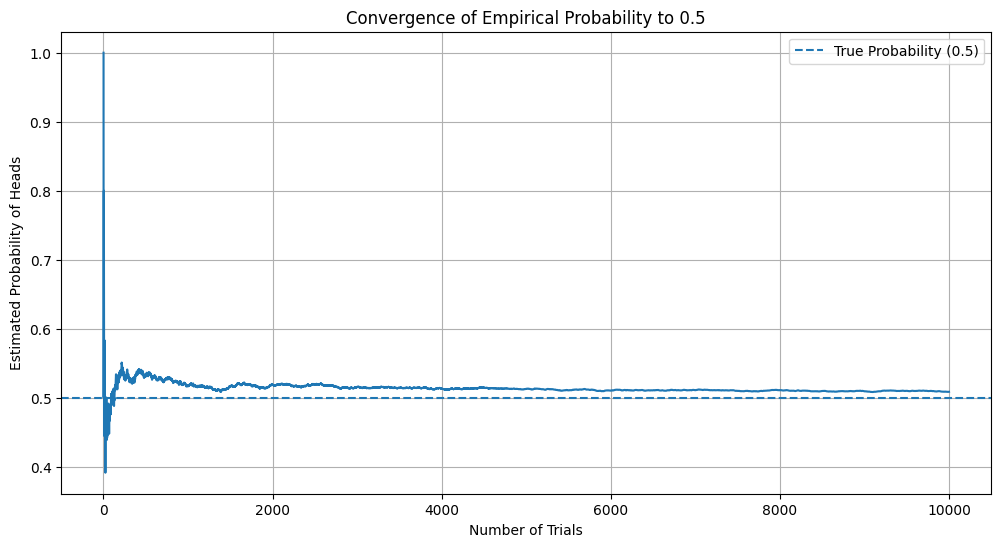

In [ ]:
import random
import matplotlib.pyplot as plt

def toss_coin():
    return random.choice(["Heads", "Tails"])

# Maximum number of trials
max_trials = 10000

# Store estimated probabilities
probabilities = []

heads_count = 0

for i in range(1, max_trials + 1):
    if toss_coin() == "Heads":
        heads_count += 1

    # Empirical probability of Heads
    probabilities.append(heads_count / i)

# Plot convergence
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_trials + 1), probabilities)
plt.axhline(0.5, linestyle='--', label='True Probability (0.5)')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Probability of Heads')
plt.title('Convergence of Empirical Probability to 0.5')
plt.legend()
plt.grid(True)
plt.show()


As the number of trials increases, the estimated **probability stabilizes** and **moves closer to the true value** (0.5).

### **🎲 Rolling a Die (Another Random Experiment)**

* Sample space is
    
    Ω = {1,2,3,4,5,6}

* The same ideas apply here: each roll is uncertain, but repeating the experiment allows us to estimate probabilities.

In [ ]:
import random

def roll_die():
    return random.randint(1, 6)

trials = 10
results = [roll_die() for _ in range(trials)]

print(results)


[2, 2, 4, 3, 3, 4, 3, 5, 5, 5]


## 2️⃣ Random Variables & Distributions

🎲 **Random Variables:** It is a way to assign a number to the outcome of a random experiment. There are two main types of random variables:
* Discrete: Take countable values
* Continuous: Take values on a range

📊 **Distributions:** A distribution describes how likely different values of a random variable are. It captures the overall shape and behavior

📈 **PMF, PDF, and CDF**
* **Probability Mass Function (PMF):** It gives the probability of each possible value (discrete)
* **Probability Density Function (PDF):** It describes how dense probabilities are around a value. The probability of an exact value is zero. Instead, we care about ranges (continuous)
* **Cumulative Distribution Function (CDF):** It tells us the probability that a random variable is less than or equal to a certain value

### **Probability Density Function (PDF):**

$$
P(a \le X \le b) = \int_a^b f(x)\,dx
$$

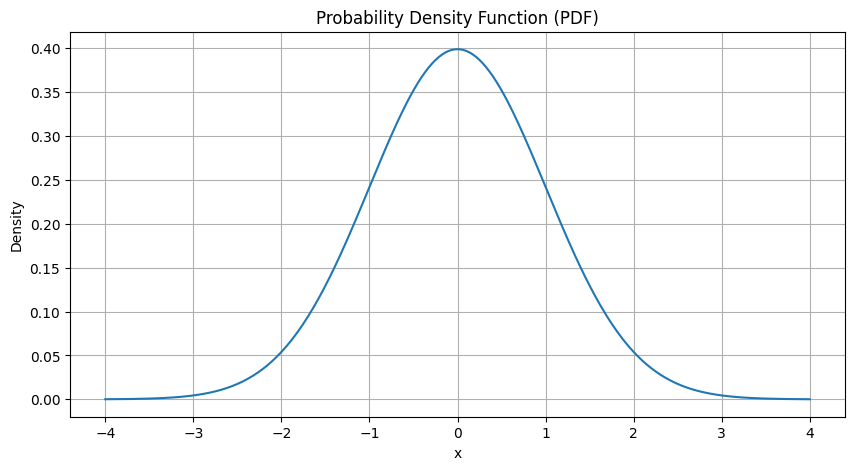

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate x values
x = np.linspace(-4, 4, 400)

# PDF of standard normal distribution
pdf = norm.pdf(x, loc=0, scale=1)

# Plot PDF
plt.figure(figsize=(10, 5))
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.grid(True)
plt.show()


### **Cumulative Distribution Function (CDF):**
$$
F(x)=P(X≤x)
$$

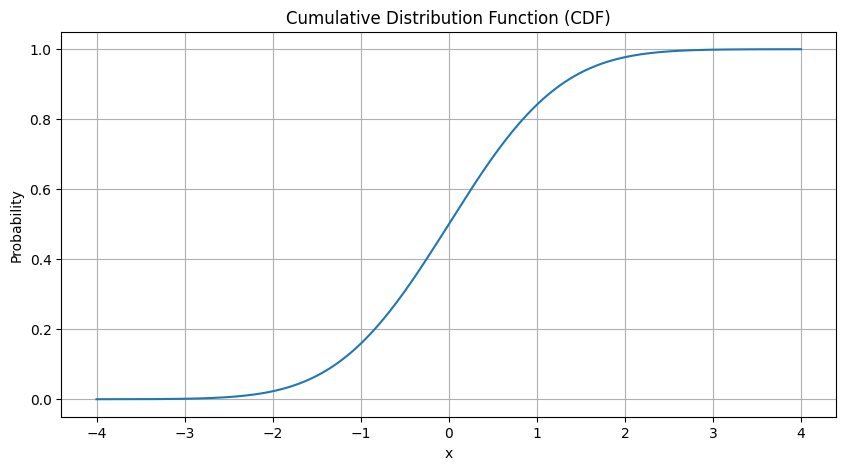

## 3️⃣ The Normal Distribution

🔔 **Normal Distribution**

It is a continuous probability distribution that is:

* Symmetric
* Centered around a mean
* Fully described by two numbers:
  * the mean (center)
  * the standard deviation (spread)

Most values cluster around the mean, and fewer values appear as you move away from it.

📐 **Mean and Standard Deviation**
  * Mean → the center of the distribution
  * Standard deviation → how spread out the values are
    * Small standard deviation → values tightly clustered
    * Large standard deviation → values more spread out

  If you increase the standard deviation, the curve becomes wider.
  
  If you change the mean, the entire curve shifts left or right.

📊 **The 68–95–99.7 Rule**
* ~68% of values lie within 1 standard deviation of the mean
* ~95% within 2 standard deviations
* ~99.7% within 3 standard deviations

### 🔔 **Normal Distribution Bell Curve**

Let’s generate one bell curve.

We need to:

* Draw random samples from a normal distribution
* Specify its mean (0) and standard deviation (1)
* Plot the result to see the familiar bell-shaped curve

This makes the idea of **“most values near the mean, fewer at the extremes”** very concrete.

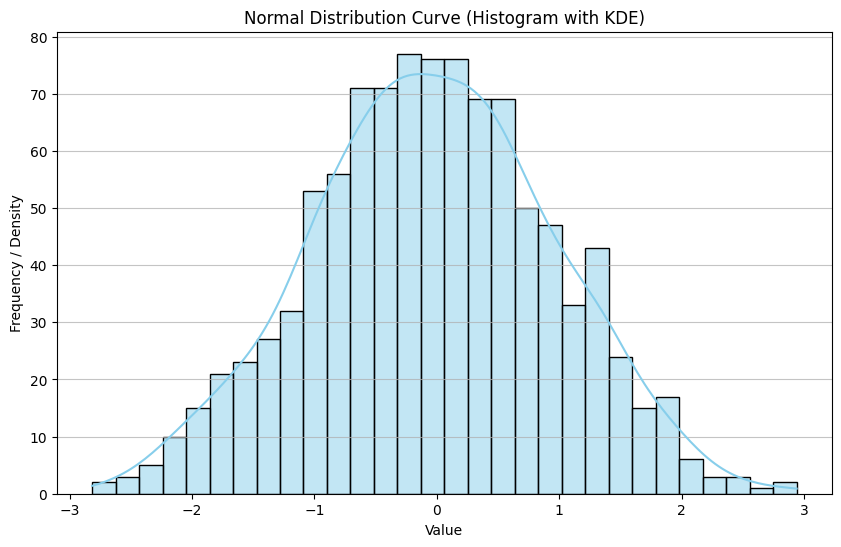

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random numbers from a normal distribution
# loc is the mean, scale is the standard deviation, size is the number of samples
mean = 0
std_dev = 1
samples = 1000
data = np.random.normal(loc=mean, scale=std_dev, size=samples)

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Normal Distribution Curve (Histogram with KDE)')
plt.xlabel('Value')
plt.ylabel('Frequency / Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 📊 **The 68–95–99.7 Rule**

You can see this rule in the below plot.

* the mean (dashed black line)
* ±1σ (green) → 68%
* ±2σ (orange) → 95%
* ±3σ (red) → 99.7%

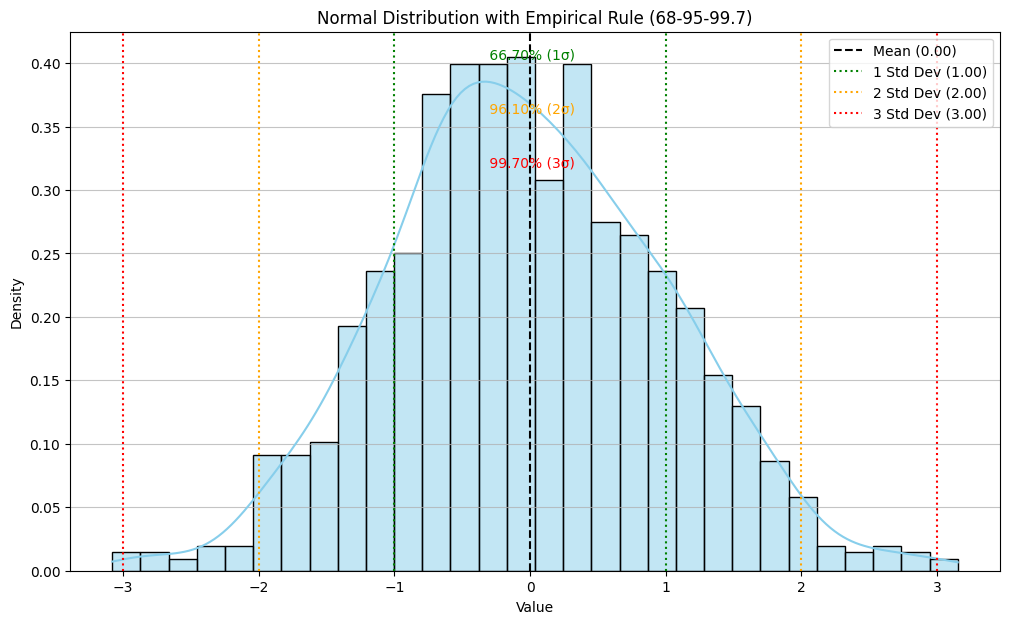

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random numbers from a normal distribution
# loc = mean, scale = standard deviation, size = number of samples
mean = 0
std_dev = 1
samples = 1000

data = np.random.normal(loc=mean, scale=std_dev, size=samples)

# Plot a histogram with a smooth density curve
plt.figure(figsize=(12, 7))
sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', stat='density') # Changed stat to 'density' for better comparison with PDF

plt.title('Normal Distribution with Empirical Rule (68-95-99.7)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Calculate percentages for empirical rule
within_1_std = np.sum((data >= mean - std_dev) & (data <= mean + std_dev)) / samples * 100
within_2_std = np.sum((data >= mean - 2 * std_dev) & (data <= mean + 2 * std_dev)) / samples * 100
within_3_std = np.sum((data >= mean - 3 * std_dev) & (data <= mean + 3 * std_dev)) / samples * 100

# Add vertical lines for mean and standard deviations
plt.axvline(mean, color='black', linestyle='--', label=f'Mean ({mean:.2f})')

plt.axvline(mean - std_dev, color='green', linestyle=':', label=f'1 Std Dev ({std_dev:.2f})')
plt.axvline(mean + std_dev, color='green', linestyle=':')

plt.axvline(mean - 2 * std_dev, color='orange', linestyle=':', label=f'2 Std Dev ({2*std_dev:.2f})')
plt.axvline(mean + 2 * std_dev, color='orange', linestyle=':')

plt.axvline(mean - 3 * std_dev, color='red', linestyle=':', label=f'3 Std Dev ({3*std_dev:.2f})')
plt.axvline(mean + 3 * std_dev, color='red', linestyle=':')

# Add text annotations for percentages
plt.text(mean, plt.gca().get_ylim()[1] * 0.95, f' {within_1_std:.2f}% (1σ)', color='green', ha='center')
plt.text(mean, plt.gca().get_ylim()[1] * 0.85, f' {within_2_std:.2f}% (2σ)', color='orange', ha='center')
plt.text(mean, plt.gca().get_ylim()[1] * 0.75, f' {within_3_std:.2f}% (3σ)', color='red', ha='center')

plt.legend()
plt.show()

## 4️⃣ From Probability to Inference
🌍 **Population vs Sample**
* **Population:** the full group we care about (all students, all customers, all measurements)
* **Sample:** a subset of that population (what we actually observe)

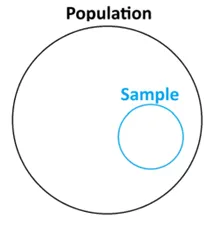

🎯 **Estimation Is Never Perfect**

Suppose we take a sample and compute its mean.

If we take another sample, we’ll likely get a slightly different mean.

Nothing changed about the population, only the sample changed.

This randomness is unavoidable and it is called sampling variability.

🔁 **Sampling Variability**

Even when sampling from the same population:

* Different samples → different results
* Larger samples → less variability
* Smaller samples → more variability

📊 **The Sampling Distribution**

If we repeatedly take samples and compute a statistic (like the mean), those statistics themselves form a distribution. This is called the sampling distribution.

Even if the original data is not normal, the sampling distribution of the mean often is normal.

❌ **Standard Error**

 The standard error measures how much a statistic (like the mean) typically varies from sample to sample.

* Large sample → small standard error
* Small sample → large standard error

It tells us how uncertain our estimate is.

### 🔁 **Showing Sampling Variability with Python**

1️⃣ Simulate a Population

First, we need a population. We can simulate one with a mean of 50 and a standard deviation of 10.

To make this concrete, we’ll generate a population of 100,000 observations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Population parameters
population_mean = 50
population_std = 10

# Simulated population
population = np.random.normal(
    loc=population_mean,
    scale=population_std,
    size=100000
)


2️⃣ Take Repeated Samples and Compute Means

Next, we take repeated samples from the population. Each sample has a size of 30, and we draw 1,000 samples in total. For each sample, we compute the sample mean.

In [ ]:
sample_size = 30
num_samples = 1000

sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(sample.mean())


3️⃣ Visualize Sampling Variability

Finally, we visualize the distribution of the sample means to see how much they vary from sample to sample.

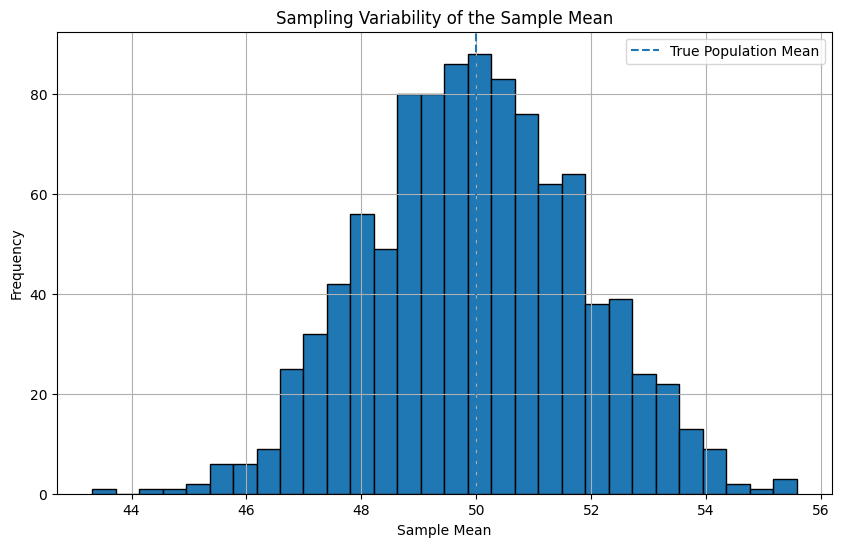

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, edgecolor="black")

plt.axvline(population_mean, linestyle="--", label="True Population Mean")

plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Variability of the Sample Mean")
plt.legend()
plt.grid(True)

plt.show()


As you can see in the plot above, the sample means are different across samples.

Even though every sample is drawn from the same population, the sample means are not identical.

This spread in the sample means is called **sampling variability**.


### ⚖️ **Compare Two Sample Sizes**

Let's compare two sample sizes and see how variability changes.

We take repeated samples from the same population using two sample sizes: 10 and 100. For each sample, we compute the sample mean and then plot the distribution of these means.




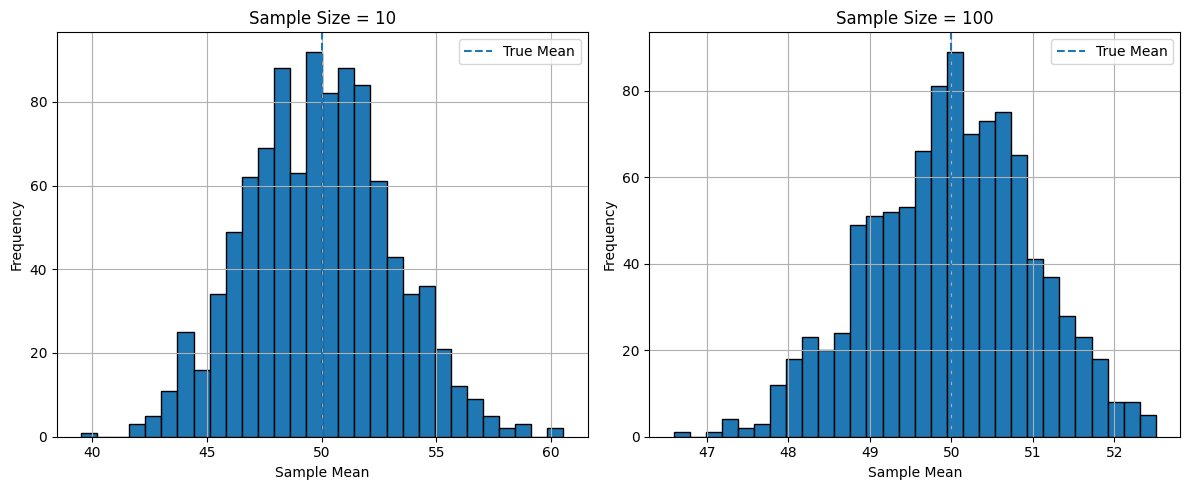

In [ ]:
sample_sizes = [10, 100]
plt.figure(figsize=(12, 5))

for i, size in enumerate(sample_sizes):
    means = []
    for _ in range(1000):
        sample = np.random.choice(population, size=size, rseplace=False)
        means.append(sample.mean())

    plt.subplot(1, 2, i + 1)
    plt.hist(means, bins=30, edgecolor="black")
    plt.axvline(population_mean, linestyle="--", label="True Mean")
    plt.title(f"Sample Size = {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


As you can see in the plots above, when the sample size is 10, the sample means are spread over a wider range, roughly [40, 60].

When the sample size increases to 100, the variability decreases, and the sample means concentrate in a much narrower range, around [47, 53].

| Sample Size | Means Range |
|-------------|-------------|
| 10          | [40, 60]    |
| 100         | [47, 53]    |

**As sample size increases, sampling variability decreases.**

Thanks for reading 🙂

Basak Kaya